In [1]:
import pandas as pd
import numpy as np
import prince

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

📊 Contenu
🔹 Attributs des données
👤 Clients

    ID : Identifiant unique du client
    Year_Birth : Année de naissance du client
    Education : Niveau d’éducation
    Marital_Status : État matrimonial
    Income : Revenu annuel du ménage
    Kidhome : Nombre d’enfants dans le foyer
    Teenhome : Nombre d’adolescents dans le foyer
    Dt_Customer : Date d’adhésion du client à l’entreprise
    Recency : Nombre de jours depuis le dernier achat
    Complain : 1 si le client a fait une réclamation dans les 2 dernières années, 0 sinon

🛒 Produits

    MntWines : Dépenses en vin sur les 2 dernières années
    MntFruits : Dépenses en fruits sur les 2 dernières années
    MntMeatProducts : Dépenses en viande sur les 2 dernières années
    MntFishProducts : Dépenses en poisson sur les 2 dernières années
    MntSweetProducts : Dépenses en sucreries sur les 2 dernières années
    MntGoldProds : Dépenses en or sur les 2 dernières années

📢 Promotions

    NumDealsPurchases : Nombre d’achats réalisés avec une réduction
    AcceptedCmp1 : 1 si le client a accepté l’offre de la 1ʳᵉ campagne, 0 sinon
    AcceptedCmp2 : 1 si le client a accepté l’offre de la 2ᵉ campagne, 0 sinon
    AcceptedCmp3 : 1 si le client a accepté l’offre de la 3ᵉ campagne, 0 sinon
    AcceptedCmp4 : 1 si le client a accepté l’offre de la 4ᵉ campagne, 0 sinon
    AcceptedCmp5 : 1 si le client a accepté l’offre de la 5ᵉ campagne, 0 sinon
    Response : 1 si le client a accepté l’offre de la dernière campagne, 0 sinon

📍 Canaux d'achat

    NumWebPurchases : Nombre d’achats effectués sur le site web
    NumCatalogPurchases : Nombre d’achats réalisés via un catalogue
    NumStorePurchases : Nombre d’achats effectués en magasin
    NumWebVisitsMonth : Nombre de visites sur le site web de l’entreprise au cours du dernier mois

In [2]:
marketing = pd.read_csv("marketing_campaign.csv", encoding="utf-8", sep= "\t")

In [3]:
#On affiche les premières lignes pour se familiariser avec le jeu de données et identifier les données quali/quanti ...
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
marketing.shape

(2240, 29)

In [5]:
#Affichage des colonnes: 
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#On remarque que les colonnes 'Z_CostContact' et 'Z_Revenue' contiennent les mêmes valeurs pour tous les individus et on 
#conclut que ces données nous ne seront pas utiles pour l'analyse que l'on veut effectuer dans le cadre de ce projet. On les retire donc de 
#notre dataset
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [7]:
#On vérifie: 216
marketing.shape

(2240, 27)

In [8]:
#Obtenir des infos sur les types de données et valeurs manquantes
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Il manque des valeurs pour Income => 2 choix s'offrent à nous : 
1) Supprimer les lignes concernées
2) Faire une moyenne des autres valeurs de Income et on les associe aux valeurs manquantes.

Ici, le choix le plus pertinent semble le choix 2). En effet, on dispose de 2216 variables sur 2240 et donc de suffisamment de variable 
pour estimer la moyenne de façon précise (estimateur sans biais : la moyenne empirique).

In [9]:
print('Income - Nombre de valeurs manquantes:', marketing['Income'].isnull().sum())
#On ajoute la médiane pour les valeurs manquantes et non pas la moyenne car la médiane correspond à la valeur centrale de notre jeu de données
#On évite ainsi tout risque de fortes influences sur la moyenne par des valeurs extrêmes (outliers)
print('Income - Valeur médiane: ', marketing['Income'].median())
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

Income - Nombre de valeurs manquantes: 24
Income - Valeur médiane:  51381.5


In [10]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


## Tri de toutes les variables (on transforme les quali en quanti, on ajoute les valeurs manquantes, on retire les outliers ...)

On transforme les quali en quanti et on renomme lorsque c'est pertinent

In [13]:
print(marketing['Education'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [14]:
marketing['Education'] = marketing['Education'].astype('category')
marketing['Marital_Status'] = marketing['Marital_Status'].astype('category')
marketing['Kidhome'] = marketing['Kidhome'].astype('category')
marketing['Teenhome'] = marketing['Teenhome'].astype('category')

#Il est préférable de convertir la colonne Dt_Customer en type datetime pour faciliter les analyses et les manipulations
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y')

In [15]:
nb_conflits = ((marketing['AcceptedCmp1'] == 1) & (marketing['AcceptedCmp2'] == 1)).sum()
print(f"Nombre de cas où AcceptedCmp1 et AcceptedCmp2 valent 1 en même temps : {nb_conflits}")
print("On ne peut donc pas transformer mes variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 en une variable AcceptedCmp qui prend 1,2,3,4 ou 5")

Nombre de cas où AcceptedCmp1 et AcceptedCmp2 valent 1 en même temps : 13
On ne peut donc pas transformer mes variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 en une variable AcceptedCmp qui prend 1,2,3,4 ou 5


In [16]:
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].astype('category')
marketing['AcceptedCmp1'] = marketing['AcceptedCmp1'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].astype('category')
marketing['AcceptedCmp2'] = marketing['AcceptedCmp2'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].astype('category')
marketing['AcceptedCmp3'] = marketing['AcceptedCmp3'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].astype('category')
marketing['AcceptedCmp4'] = marketing['AcceptedCmp4'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].astype('category')
marketing['AcceptedCmp5'] = marketing['AcceptedCmp5'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Complain'] = marketing['Complain'].astype('category')
marketing['Complain'] = marketing['Complain'].cat.rename_categories({0: 'No', 1:'Yes'})
marketing['Response'] = marketing['Response'].astype('category')
marketing['Response'] = marketing['Response'].cat.rename_categories({0: 'No', 1:'Yes'})

## On passe maintenant aux outliers par catégories des données quantitatives

## I) Clients : 

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0af188c0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0af18ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0b1a9430>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0af19550>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0af19880>],
 'means': []}

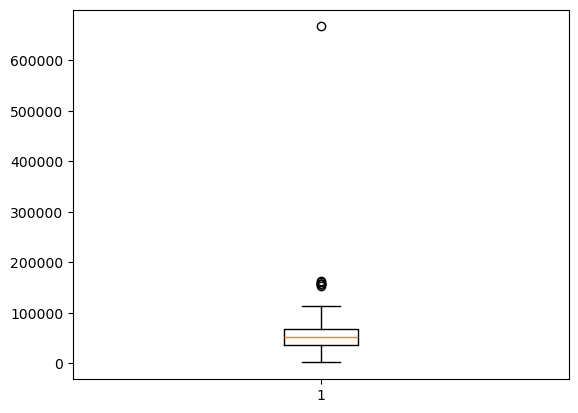

In [17]:
plt.boxplot(marketing['Income'])

In [18]:
nb_riche = (marketing['Income'] > 6e5).sum()
print(f"Nombre de cas où Income> 600 000 : {nb_riche}")

Nombre de cas où Income> 600 000 : 1


In [19]:
riche = marketing.loc[marketing['Income'] > 6e5, 'ID']
print(riche)

#2233 c'est le numéro de la ligne

2233    9432
Name: ID, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x701a0adc6630>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0adc6bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0adc63c0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0adc7200>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0adc7530>],
 'means': []}

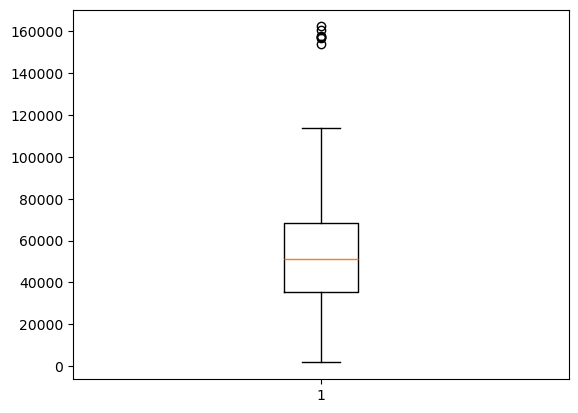

In [20]:
marketing = marketing.drop(marketing[marketing['ID'] == 9432].index)
plt.boxplot(marketing['Income'])

Est ce qu'on retire les 3 points ?

In [21]:
#marketing.info()

Nombre de vieux : 3
Il n'y en a que 3 donc on les retire car cela n'a pas de sens de garder des gens qui sont nés avant 1905 et qui sont surement plus en vie


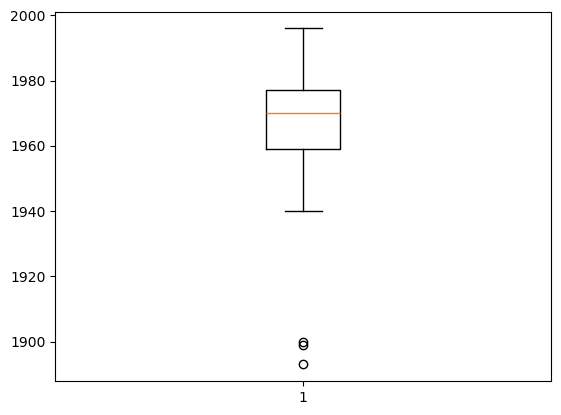

In [22]:
plt.boxplot(marketing['Year_Birth'])
nb_vieux = (marketing['Year_Birth'] < 1920).sum()
print(f"Nombre de vieux : {nb_vieux}")
print("Il n'y en a que 3 donc on les retire car cela n'a pas de sens de garder des gens qui sont nés avant 1905 et qui sont surement plus en vie")

In [23]:
vieux = marketing.loc[marketing['Year_Birth'] < 1920, 'ID']
#print(vieux)
for i in vieux: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a472090>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a472630>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a471dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a472b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a472db0>],
 'means': []}

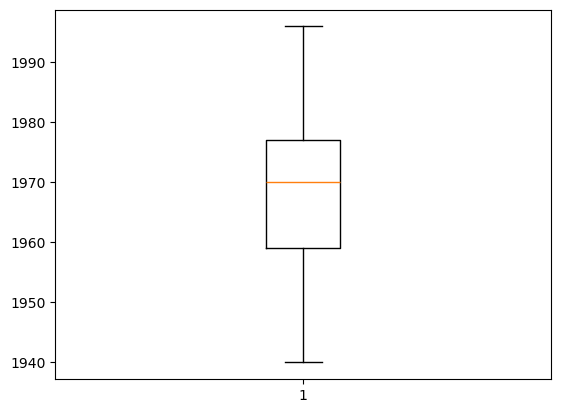

In [24]:
plt.boxplot(marketing['Year_Birth'])

## II) Produits

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a4ec200>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a4ec800>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a4bbf20>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a4ece30>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a4ed100>],
 'means': []}

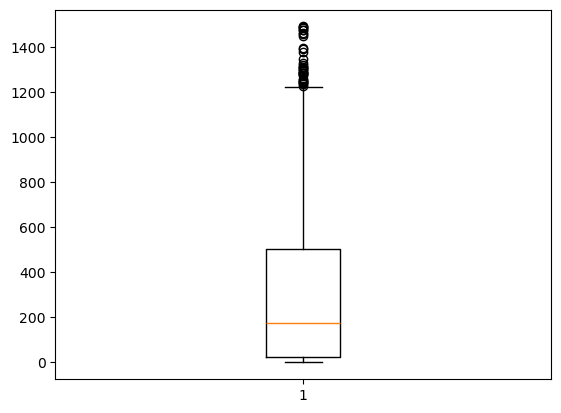

In [25]:
plt.boxplot(marketing['MntWines'])

In [26]:
nb_alcooliques = (marketing['MntWines'] > 1200).sum()
print(f"Nombre d'alcooliques : {nb_alcooliques}")
print("Il y en a beacoup, on les laisse")

Nombre d'alcooliques : 42
Il y en a beacoup, on les laisse


In [27]:
#marketing.info()

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a32bda0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a3602c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a32bb90>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a360770>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a360a40>],
 'means': []}

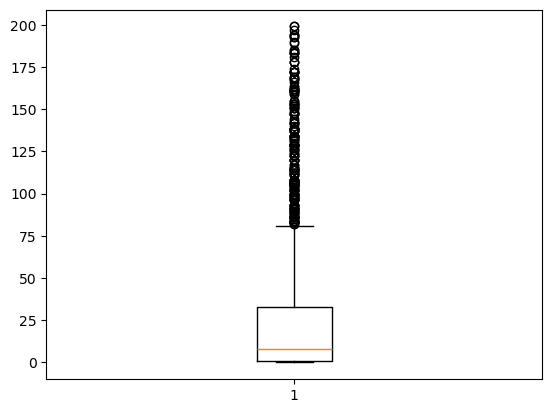

In [28]:
plt.boxplot(marketing['MntFruits'])

On garde tout

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a3a39e0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a3d0050>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a3a3800>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a3d05f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a3d0890>],
 'means': []}

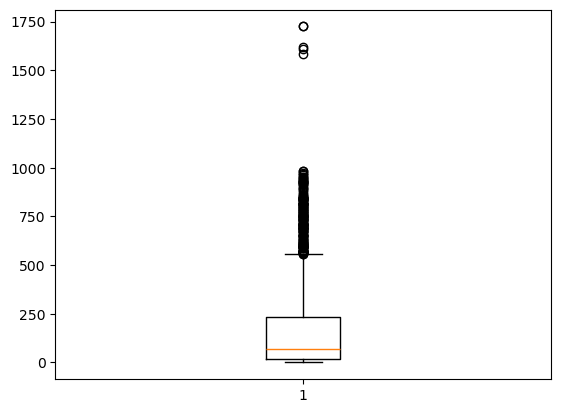

In [29]:
plt.boxplot(marketing['MntMeatProducts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a21e690>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a21ec90>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a21e4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a21f260>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a21f500>],
 'means': []}

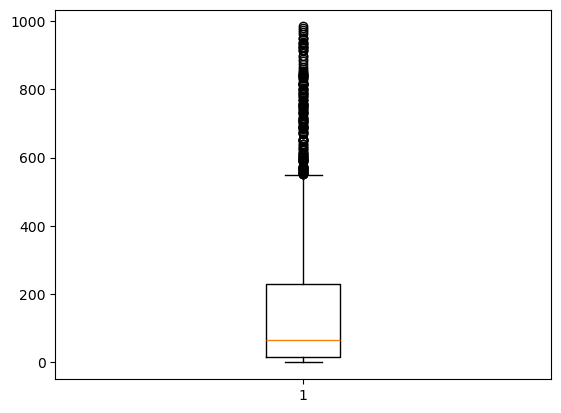

In [30]:
viandards = marketing.loc[marketing['MntMeatProducts'] > 1500, 'ID']
#print(viandards)
for i in viandards: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)
plt.boxplot(marketing['MntMeatProducts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a298890>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a298e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a2512b0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a299460>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a299790>],
 'means': []}

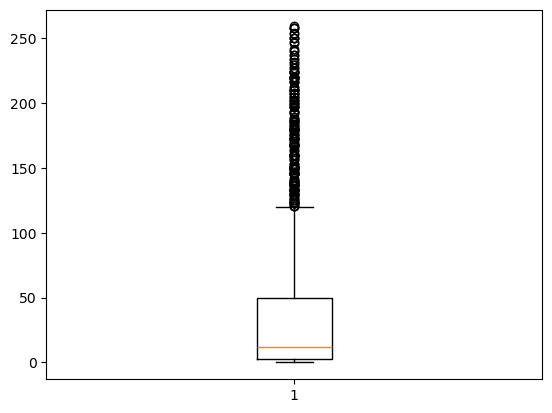

In [31]:
plt.boxplot(marketing['MntFishProducts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a2de960>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a2deed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a2be870>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a2df410>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a2df6b0>],
 'means': []}

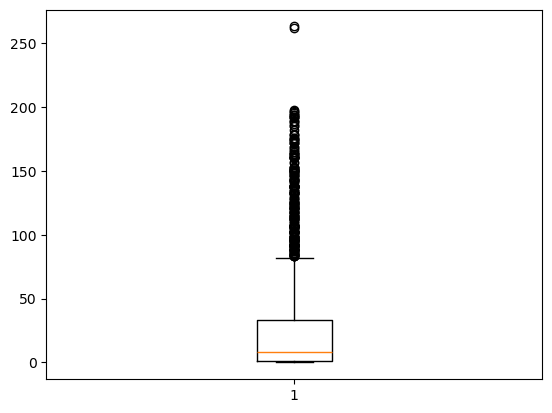

In [32]:
plt.boxplot(marketing['MntSweetProducts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a170650>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a170bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a1703b0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a171190>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a1714c0>],
 'means': []}

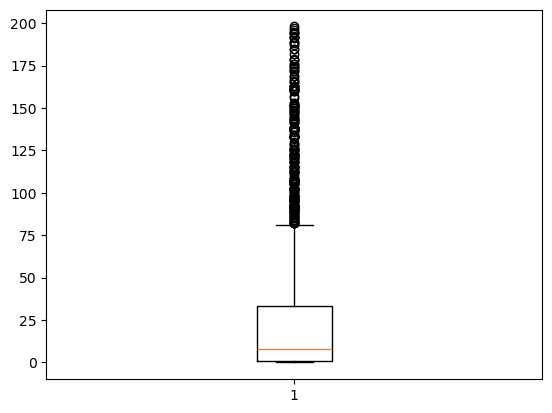

In [33]:
gourmands = marketing.loc[marketing['MntSweetProducts'] > 225, 'ID']
#print(gourmands)
for i in gourmands: 
    marketing = marketing.drop(marketing[marketing['ID'] == i].index)
plt.boxplot(marketing['MntSweetProducts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a1cc6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a1cc7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a1cc440>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a1ccd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a1cd010>],
 'means': []}

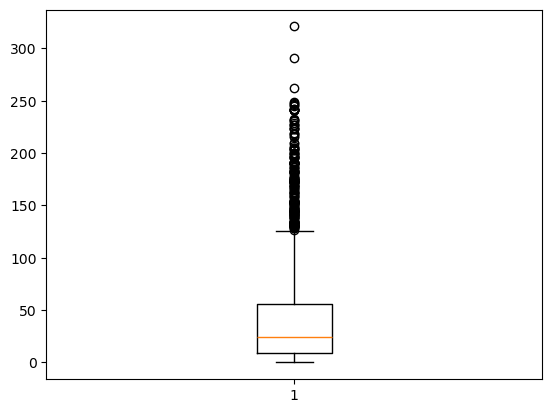

In [34]:
plt.boxplot(marketing['MntGoldProds'])

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a4404a0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0af1a900>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a42bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0b193080>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0ae1ab70>],
 'means': []}

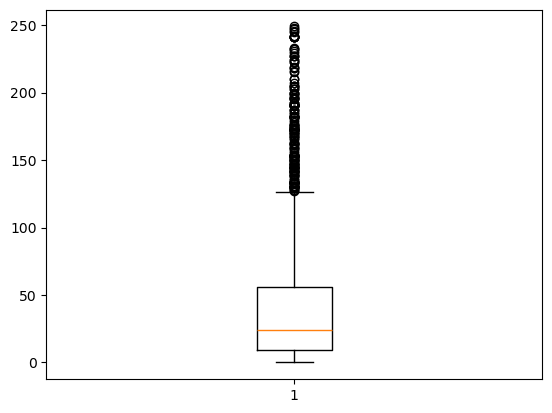

In [35]:
for i in range(3):
    marketing = marketing.drop(marketing['MntGoldProds'].idxmax())
plt.boxplot(marketing['MntGoldProds'])
#On retire les 3 premiers parce que j'arrive pas à voir quel est la valeur du seuil. Par contre, il faut pas le run 

## III) Promotions

{'whiskers': [<matplotlib.lines.Line2D at 0x701a0a03c4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x701a0a03caa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x701a0a03c230>],
 'medians': [<matplotlib.lines.Line2D at 0x701a0a03d010>],
 'fliers': [<matplotlib.lines.Line2D at 0x701a0a03d2e0>],
 'means': []}

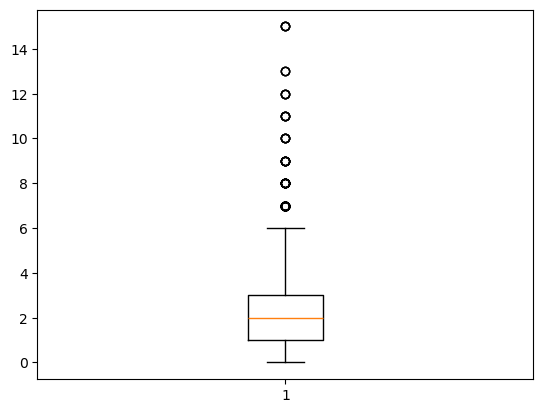

In [36]:
plt.boxplot(marketing['NumDealsPurchases'])

In [37]:
print("Pour l'instant, on décide de tout garder car les valeurs ne nous semble pas aberrantes")

Pour l'instant, on décide de tout garder car les valeurs ne nous semble pas aberrantes


## IV) Canaux d'achats

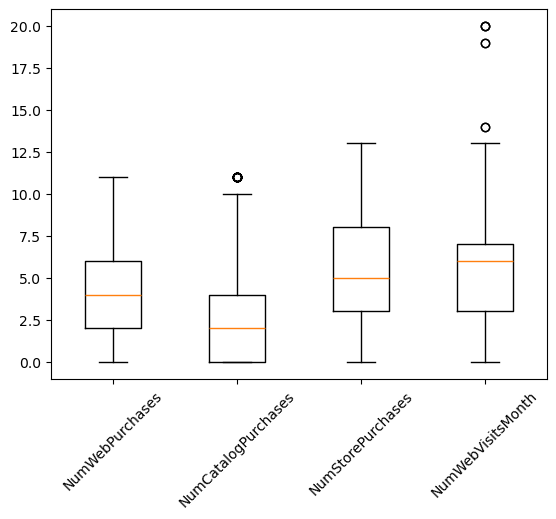

In [38]:
# Créer deux boxplots côte à côte
plt.boxplot([marketing['NumWebPurchases'], marketing['NumCatalogPurchases'], marketing['NumStorePurchases'], marketing['NumWebVisitsMonth']], positions=[1, 2, 3, 4])

# Ajouter des labels sur l'axe x pour chaque boxplot
plt.xticks([1, 2, 3, 4], ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

# Afficher le graphique
plt.xticks(rotation=45) #permet d'orienter la légende
plt.show()

On garde tout, c'est pas aberrant

## Analyse descriptive sur les données qualitatives aux

In [39]:
print(marketing.dtypes)

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                      category
Teenhome                     category
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                 category
AcceptedCmp4                 category
AcceptedCmp5                 category
AcceptedCmp1                 category
AcceptedCmp2                 category
Complain                     category
Response    

In [40]:
# Vérifier les valeurs manquantes pour toutes les variables de type category
print(marketing.select_dtypes(include='category').isnull().sum())

Education         0
Marital_Status    0
Kidhome           0
Teenhome          0
AcceptedCmp3      0
AcceptedCmp4      0
AcceptedCmp5      0
AcceptedCmp1      0
AcceptedCmp2      0
Complain          0
Response          0
dtype: int64


In [41]:
for col in marketing.select_dtypes(include='category').columns:
    print(marketing[col].value_counts())

Education
Graduation    1122
PhD            481
Master         369
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     860
Together    576
Single      475
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Kidhome
0    1283
1     895
2      48
Name: count, dtype: int64
Teenhome
0    1148
1    1027
2      51
Name: count, dtype: int64
AcceptedCmp3
No     2063
Yes     163
Name: count, dtype: int64
AcceptedCmp4
No     2060
Yes     166
Name: count, dtype: int64
AcceptedCmp5
No     2064
Yes     162
Name: count, dtype: int64
AcceptedCmp1
No     2082
Yes     144
Name: count, dtype: int64
AcceptedCmp2
No     2196
Yes      30
Name: count, dtype: int64
Complain
No     2206
Yes      20
Name: count, dtype: int64
Response
No     1892
Yes     334
Name: count, dtype: int64


#### Changement de date de naissance en tranche d'age

(array([ 23., 155., 241., 276., 254., 437., 419., 201., 177.,  43.]),
 array([1940. , 1945.6, 1951.2, 1956.8, 1962.4, 1968. , 1973.6, 1979.2,
        1984.8, 1990.4, 1996. ]),
 <BarContainer object of 10 artists>)

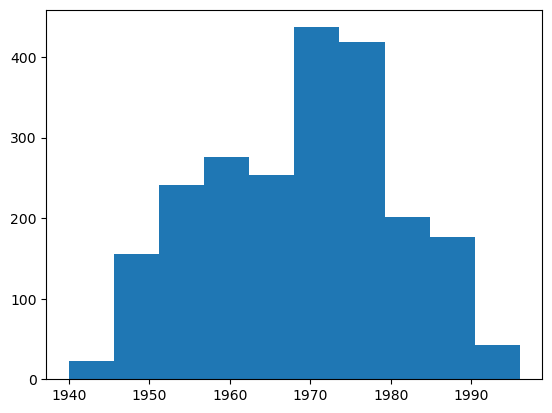

In [42]:
plt.hist(marketing["Year_Birth"])

In [43]:
max_year = marketing["Year_Birth"].max()
min_year = marketing["Year_Birth"].min()
print(max_year)

1996


On transforme Year_Birth en tranche d'âge "18-25", "26-35", "36-45", "46-55", "56-65", ">66" (il n'y a pas de tranche d'âge <18 car le personne la plus jeune a 19 ans)

In [44]:
marketing["Age_Categorie"] = pd.cut(
    2015 - marketing["Year_Birth"],  # On calcule l'âge
    bins=[18, 25, 35, 45, 55, 65, float('inf')],  # Définition des tranches d'âge
    labels=["Age_18-25", "Age_26-35", "Age_36-45", "Age_46-55", "Age_56-65", "Age_>66"],  # Noms des catégories
    right=True  # Inclut la borne supérieure dans l'intervalle
)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Age_18-25'),
  Text(1, 0, 'Age_26-35'),
  Text(2, 0, 'Age_36-45'),
  Text(3, 0, 'Age_46-55'),
  Text(4, 0, 'Age_56-65'),
  Text(5, 0, 'Age_>66')])

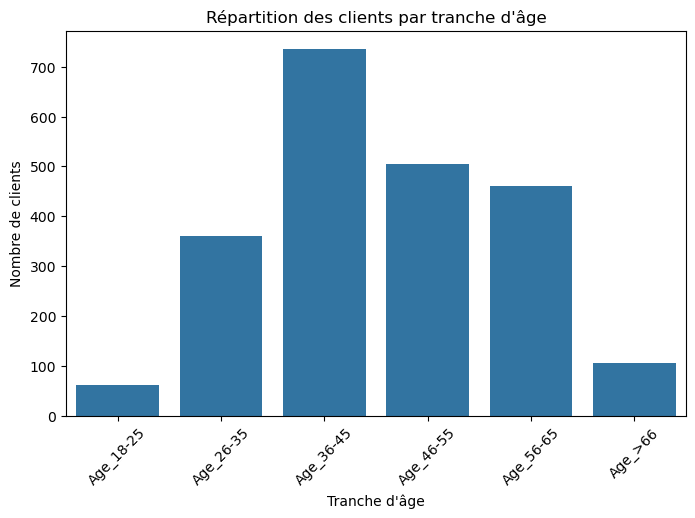

In [45]:
plt.figure(figsize=(8, 5))  # Ajuster la taille du graphique
sns.countplot(data=marketing, x="Age_Categorie", order=["Age_18-25", "Age_26-35", "Age_36-45", "Age_46-55", "Age_56-65", "Age_>66"])

plt.title("Répartition des clients par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)  # Incliner les labels si besoin

In [46]:
marketing.drop(['Year_Birth'], axis=1, inplace=True)

In [47]:
marketing.describe()

,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2226.000000,2226.000000,2226,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000
mean,5587.309973,51866.027403,2013-07-10 06:46:15.202156288,49.180144,305.366128,26.374663,163.987871,37.683288,26.957323,43.610961,2.316262,4.059748,2.627134,5.819856,5.332884
min,0.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2817.750000,35568.250000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,51381.500000,2013-07-08 00:00:00,50.000000,177.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8419.500000,68146.500000,2013-12-30 18:00:00,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,162397.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.000000,15.000000,11.000000,11.000000,13.000000,20.000000
std,3247.899444,20965.736549,NaN,28.917199,336.833083,39.784439,214.798699,54.725964,40.759106,50.887517,1.876089,2.625121,2.745089,3.238030,2.400406


In [48]:
print(marketing.dtypes)

ID                              int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                      category
Teenhome                     category
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                 category
AcceptedCmp4                 category
AcceptedCmp5                 category
AcceptedCmp1                 category
AcceptedCmp2                 category
Complain                     category
Response                     category
Age_Categori

In [49]:
# Pour chaque colonne de type "object" (qui contient des valeurs qualitatives), afficher les modalités
for col in marketing.select_dtypes(include=['category']).columns:
    print(f"Modalités de la variable {col} :")
    print(marketing[col].value_counts())
    print("\n")


Modalités de la variable Education :
Education
Graduation    1122
PhD            481
Master         369
2n Cycle       200
Basic           54
Name: count, dtype: int64


Modalités de la variable Marital_Status :
Marital_Status
Married     860
Together    576
Single      475
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Modalités de la variable Kidhome :
Kidhome
0    1283
1     895
2      48
Name: count, dtype: int64


Modalités de la variable Teenhome :
Teenhome
0    1148
1    1027
2      51
Name: count, dtype: int64


Modalités de la variable AcceptedCmp3 :
AcceptedCmp3
No     2063
Yes     163
Name: count, dtype: int64


Modalités de la variable AcceptedCmp4 :
AcceptedCmp4
No     2060
Yes     166
Name: count, dtype: int64


Modalités de la variable AcceptedCmp5 :
AcceptedCmp5
No     2064
Yes     162
Name: count, dtype: int64


Modalités de la variable AcceptedCmp1 :
AcceptedCmp1
No     2082
Yes     144
Name: count, dtype: i

In [50]:
marketing['Marital_Status'] = marketing['Marital_Status'].replace({
    'YOLO': None,  # Retirer YOLO
    'Absurd': None,  # Retirer Absurd
    'Married': 'Couple',  # Réunir Married et Together dans 'Couple'
    'Together': 'Couple',
    'Single': 'Seule',  # Réunir Single, Alone, Widow dans 'Seule'
    'Alone': 'Seule',
    'Widow': 'Seule',
    'Divorced': 'Divorcé'  # Garder Divorced sous 'Divorcé'
})

# Vérifier les modalités après modification
print(marketing['Marital_Status'].value_counts())

Marital_Status
Couple     1436
Seule       555
Divorcé     231
Name: count, dtype: int64


/tmp/ipykernel_26981/2945967578.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  marketing['Marital_Status'] = marketing['Marital_Status'].replace({


In [51]:
marketing['Enfant'] = marketing['Kidhome'].astype(int) + marketing['Teenhome'].astype(int)
marketing['Enfant'] = marketing['Enfant'].astype('category')


In [53]:
print(marketing['Enfant'].value_counts())

Enfant
1    1121
0     632
2     420
3      53
Name: count, dtype: int64


Pour la suite => commencer à essayer de comprendre/visualiser certaines tendances "à la main"

## Premières analyses

### Corrélations 

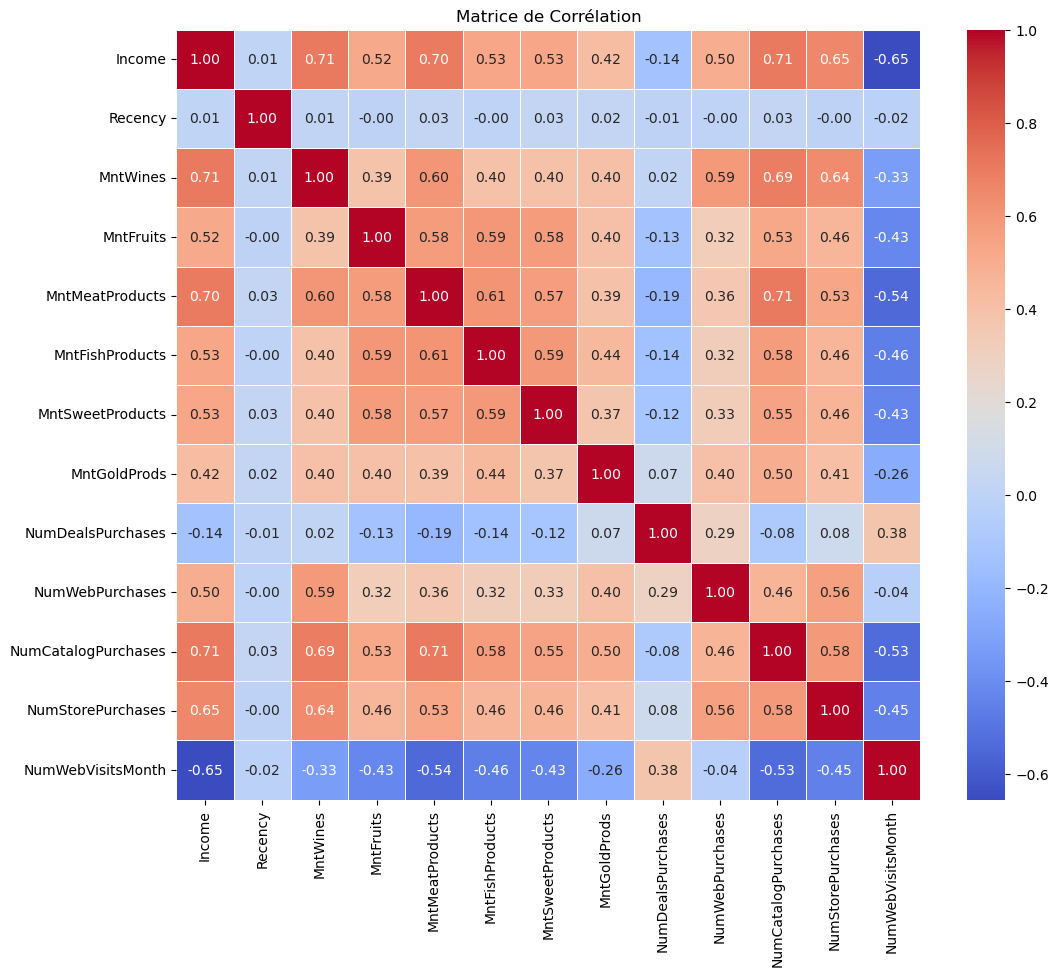

In [52]:
# Sélectionner uniquement les colonnes numériques (int64, float64)
numeric_columns = marketing.select_dtypes(include=['number']).drop(columns=['ID'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()